<a href="https://colab.research.google.com/github/cassiamariane/data-science/blob/main/An%C3%A1lise_de_Ativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Ativos

# Introdução

A análise abaixo foi realizada a partir de dados públicos disponibilizados pelas biblioteca yfinance.

A motivação é interpretar profundamente a correlação entre os valores dos ativos a partir de dados históricos, mas especificamente entre os anos de 2022 à 2024. Para assim servir como uma pesquisa do comportamento no mercado financeiro nesse período.

## Dicionário de dados

**Ações**

*   PETR4.SA: Petrobras
*   WEGE3.SA: Weg
*   MGLU3.SA: Magazine Luiza
*   LREN3.SA: Lojas Renner
*   VALE3.SA: Vale
*   BPAC11.SA: Banco BTG Pactual

**Fundos de Índice e Imobiliários**

*   KNRI11.SA: Kinea Renda Imobiliaria FII
*   ONEF11.SA: The One
*   HCTR11.SA: Hectare CE
*   HGBS11.SA: Hedge Brasil Shopping
*   SMAL11.SA: iShares BM&FBovespa Small Cap
*   IVVB11.SA: iShares S&P 500 FIC de Fundo de Indice IE

**Moedas**

*   BTC-USD: Bitcoin
*   ETH-USD: Ether
*   LTC-USD: Litecoin
*   DOGE-USD: Dogecoin
*   XRP-USD: XRP
*   ADA-USD: Cardano

**Variávies**
*   initial_date: Data inicial do período da análise (01/01/2022)
*   stock_tickers: Lista com os códigos de negociações de ações na Bolsa de Valores considerados para a análise
*   fund_tickers: Lista com os códigos de negociações de fundos imobiliários e de índice na Bolsa de Valores considerados para a análise
*   cryptos: Lista com os códigos de negociações de criptomoedas na Bolsa de Valores considerados para a análise
*   dollar: Dados histórios do dollar
*   dataset: Dados brutos de cada um dos ativos, contendo predominantemente as colunas: Date, Open, High, Low, Close, Adj Close e Volume
*   stock_values: Dados históricos sobre os valores das ações consideradas para a análise
*   fund_values: Dados históricos sobre os valores dos fundos imobiliários e de índice considerados para a análise
*   crypto_values: Dados históricos sobre os valores das criptomoedas consideradas para a análise
*   dollar_values: Dados histórios do valor do dollar
*   datasets: Lista com os datasets de todos os ativos
*   df: DataFrame final com dados histórios dos valores de todos os ativos considerados

# Importando bibliotecas e instalando dependências

In [67]:
import pandas as pd
import yfinance as yf
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

# Importando dados de ações

In [68]:
initial_date = '2022-01-01'
stock_tickers = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'LREN3.SA', 'VALE3.SA', 'BPAC11.SA']
dataset = yf.download(stock_tickers[0], start=initial_date)
dataset.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,28.540001,29.219999,28.530001,29.090000,14.063067,52704700
2022-01-04,29.160000,29.400000,28.910000,29.200001,14.116244,51739200
2022-01-05,29.190001,29.270000,27.940001,28.070000,13.569966,78459800
2022-01-06,28.290001,28.650000,27.840000,28.049999,13.560297,61163100
2022-01-07,28.110001,28.290001,27.820000,28.180000,13.623145,47507600


In [69]:
stock_values = pd.DataFrame()
for ticker in stock_tickers:
  stock_values[ticker] = yf.download(ticker,start=initial_date)['Adj Close']
stock_values.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,PETR4.SA,WEGE3.SA,MGLU3.SA,LREN3.SA,VALE3.SA,BPAC11.SA
Date,,,,,,
2022-01-03,14.063067,30.654587,6.285372,21.289324,64.069542,18.952330
2022-01-04,14.116244,30.501411,6.182487,21.031046,63.313862,18.519024
2022-01-05,13.569965,28.893045,6.004775,20.007170,63.913486,17.718355
2022-01-06,13.560299,28.883478,5.845770,21.031046,65.203079,17.525919
2022-01-07,13.623146,28.155882,5.817711,21.206308,68.997978,17.658842


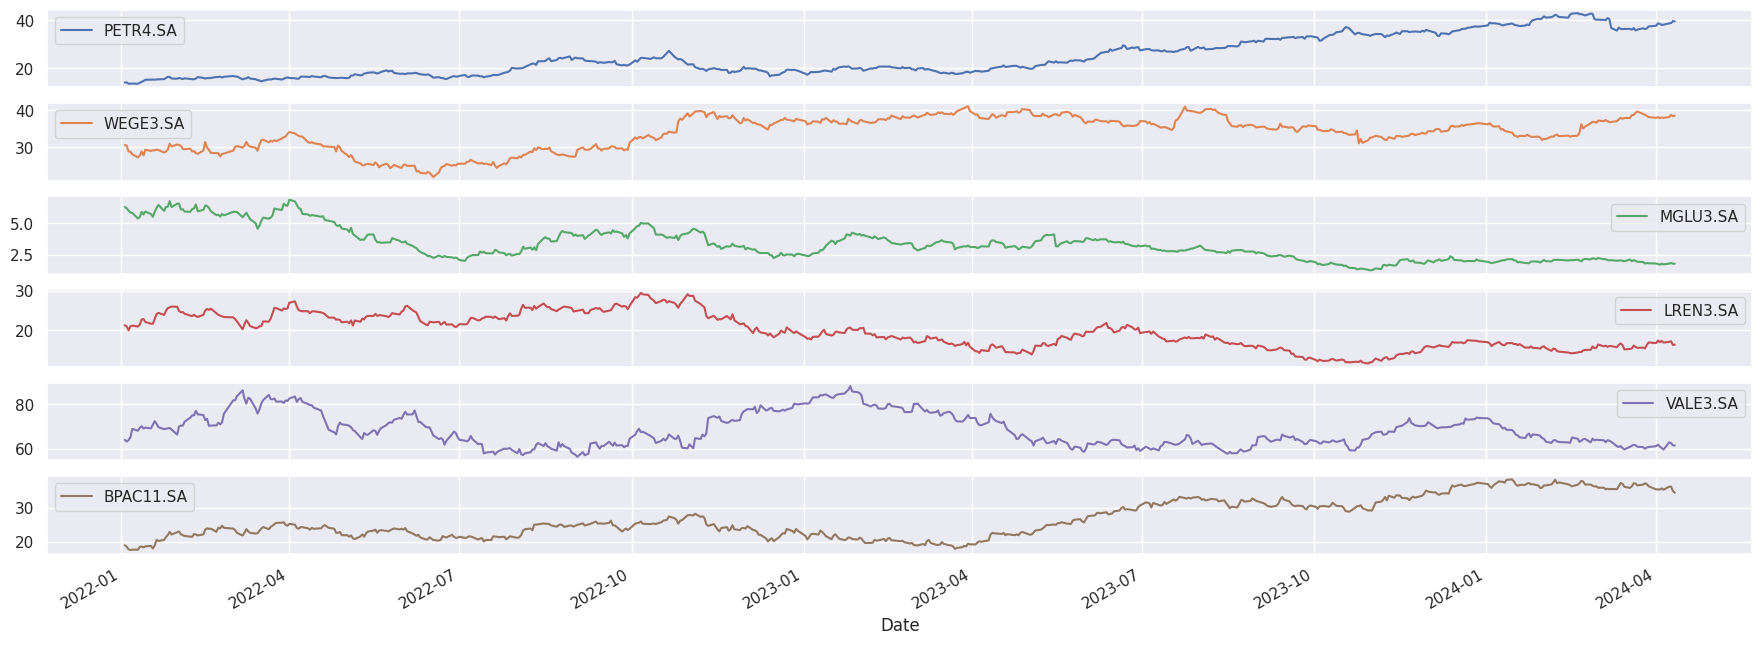

In [70]:
sns.set()
stock_values.plot(subplots=True, figsize=(22,8));

# Importando dados de fundos imobiliários

In [71]:
fund_tickers = ['KNRI11.SA', 'ONEF11.SA', 'HCTR11.SA', 'HGBS11.SA', 'SMAL11.SA', 'IVVB11.SA']
dataset = yf.download(fund_tickers[0], start=initial_date)
dataset.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,141.250000,141.889999,135.750000,136.899994,116.600708,31158
2022-01-04,136.899994,141.889999,134.020004,134.070007,114.190338,29937
2022-01-05,134.550003,137.399994,133.509995,134.199997,114.301056,32590
2022-01-06,134.740005,137.279999,132.550003,133.910004,114.054039,31240
2022-01-07,134.750000,135.399994,132.669998,133.529999,113.730385,30930


In [72]:
fund_values = pd.DataFrame()
for ticker in fund_tickers:
  fund_values[ticker] = yf.download(ticker,start=initial_date)['Adj Close']
fund_values.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,KNRI11.SA,ONEF11.SA,HCTR11.SA,HGBS11.SA,SMAL11.SA,IVVB11.SA
Date,,,,,,
2022-01-03,116.600708,100.067535,97.519691,159.839844,109.550003,297.000000
2022-01-04,114.190338,99.149490,97.833229,155.827972,107.000000,296.549988
2022-01-05,114.301056,99.737030,96.571503,153.788574,102.169998,293.600006
2022-01-06,114.054039,99.883942,97.015022,152.025040,101.830002,291.299988
2022-01-07,113.730385,98.657417,97.114426,149.191666,101.949997,287.950012


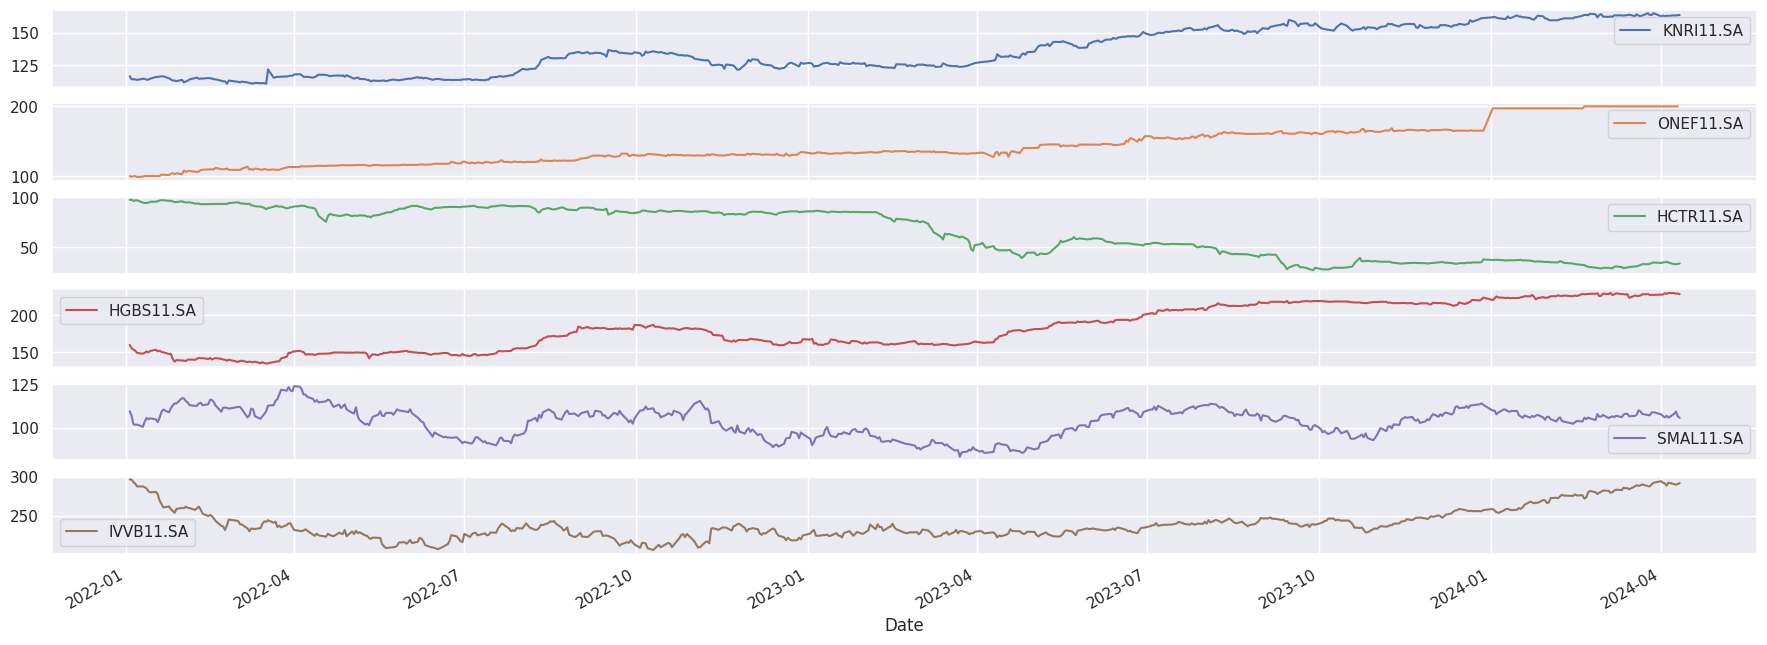

In [73]:
sns.set()
fund_values.plot(subplots=True, figsize=(22,8));

# Importando dados de criptomoedas

In [74]:
cryptos = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'DOGE-USD', 'XRP-USD', 'ADA-USD']
dataset = yf.download(cryptos[0], start=initial_date)
dataset.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [75]:
cryptos_values = pd.DataFrame()
for cripto in cryptos:
  cryptos_values[ticker] = yf.download(ticker,start=initial_date)['Close']
cryptos_values.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,IVVB11.SA
Date,
2022-01-03,297.000000
2022-01-04,296.549988
2022-01-05,293.600006
2022-01-06,291.299988
2022-01-07,287.950012


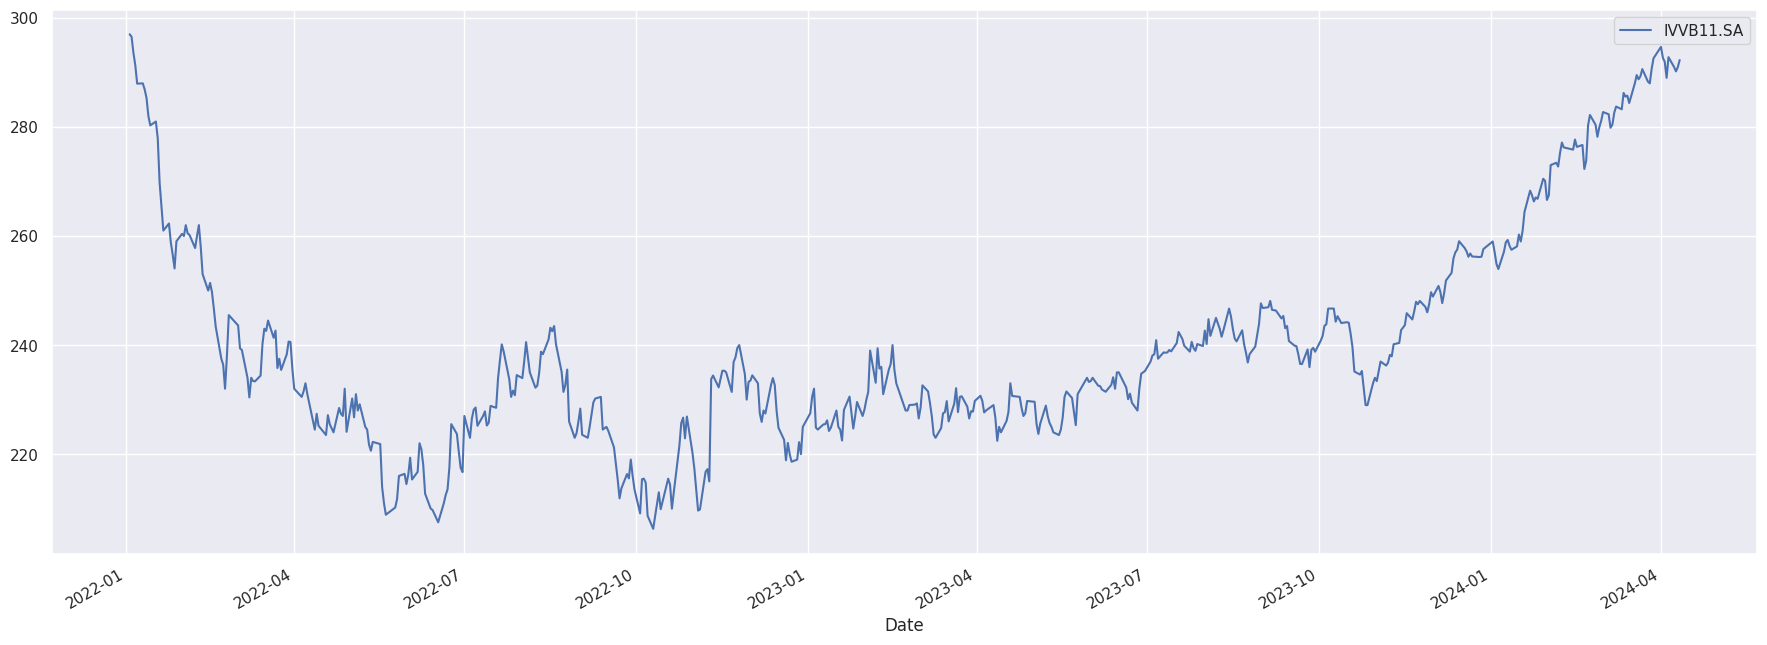

In [76]:
sns.set()
cryptos_values.plot(subplots=True, figsize=(22,8));

In [77]:
dollar = yf.download('USDBRL=X', start=initial_date)
dollar_values = pd.DataFrame(dollar.Close).rename(columns = {'Close': 'Dollar'})
dollar_values.head()

[*********************100%%**********************]  1 of 1 completed


,Dollar
Date,
2022-01-03,5.569300
2022-01-04,5.681200
2022-01-05,5.676200
2022-01-06,5.705635
2022-01-07,5.682400


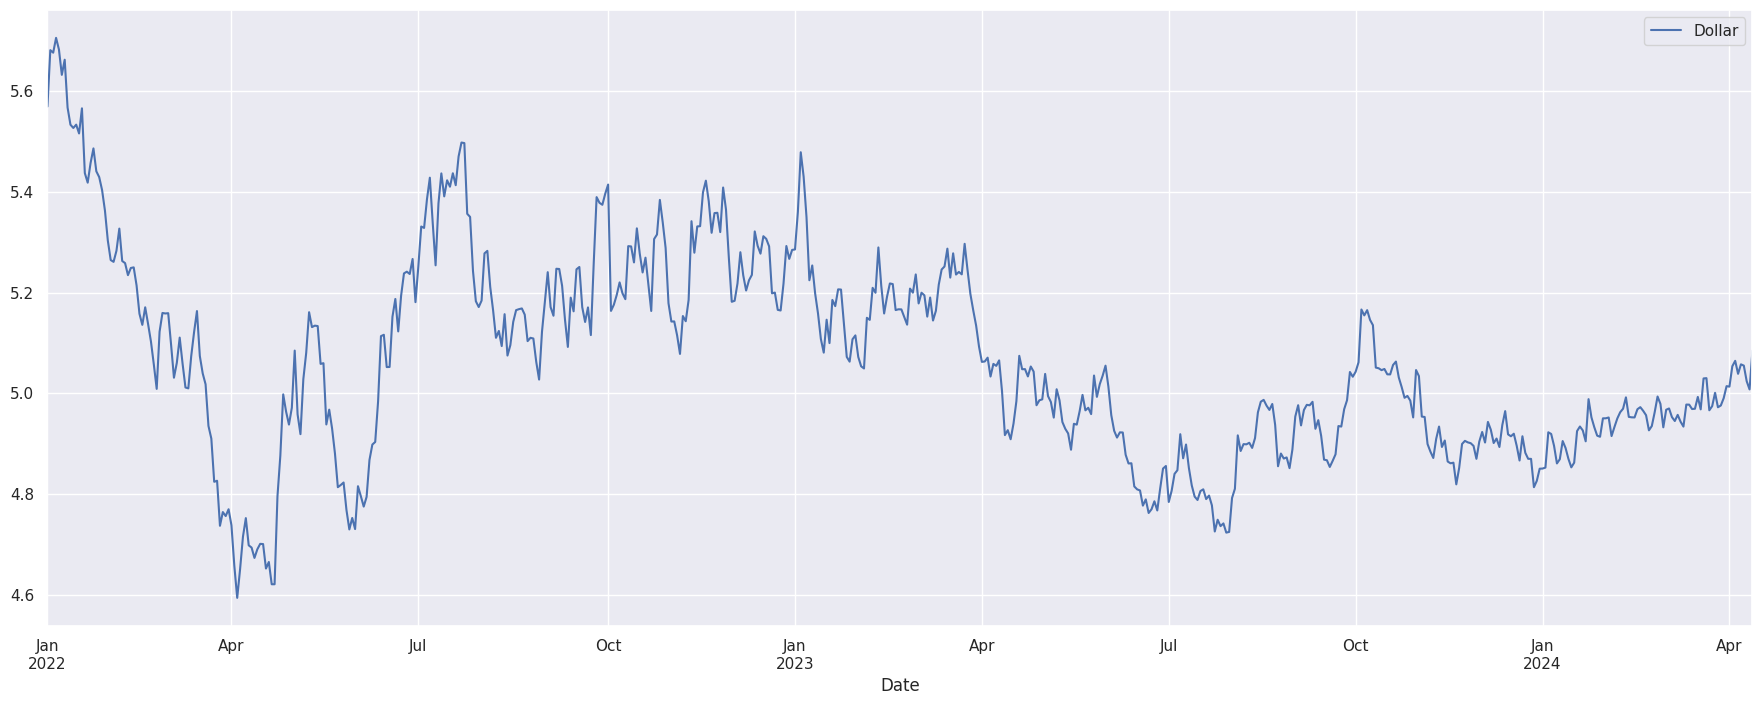

In [78]:
sns.set()
dollar_values.plot(subplots=True, figsize=(22,8));

# Mesclando todos os ativos em um DataFrame

In [79]:
from functools import reduce
datasets = [stock_values, fund_values, cryptos_values, dollar_values]
df = reduce(lambda left,right: pd.merge(left, right, on = 'Date', how = 'inner'), datasets)
df.head()

,PETR4.SA,WEGE3.SA,MGLU3.SA,LREN3.SA,VALE3.SA,BPAC11.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,HGBS11.SA,SMAL11.SA,IVVB11.SA_x,IVVB11.SA_y,Dollar
Date,,,,,,,,,,,,,,
2022-01-03,14.063067,30.654587,6.285372,21.289324,64.069542,18.952330,116.600708,100.067535,97.519691,159.839844,109.550003,297.000000,297.000000,5.569300
2022-01-04,14.116244,30.501411,6.182487,21.031046,63.313862,18.519024,114.190338,99.149490,97.833229,155.827972,107.000000,296.549988,296.549988,5.681200
2022-01-05,13.569965,28.893045,6.004775,20.007170,63.913486,17.718355,114.301056,99.737030,96.571503,153.788574,102.169998,293.600006,293.600006,5.676200
2022-01-06,13.560299,28.883478,5.845770,21.031046,65.203079,17.525919,114.054039,99.883942,97.015022,152.025040,101.830002,291.299988,291.299988,5.705635
2022-01-07,13.623146,28.155882,5.817711,21.206308,68.997978,17.658842,113.730385,98.657417,97.114426,149.191666,101.949997,287.950012,287.950012,5.682400


# Plotando um Mapa de Calor com todos os ativos

<Axes: >

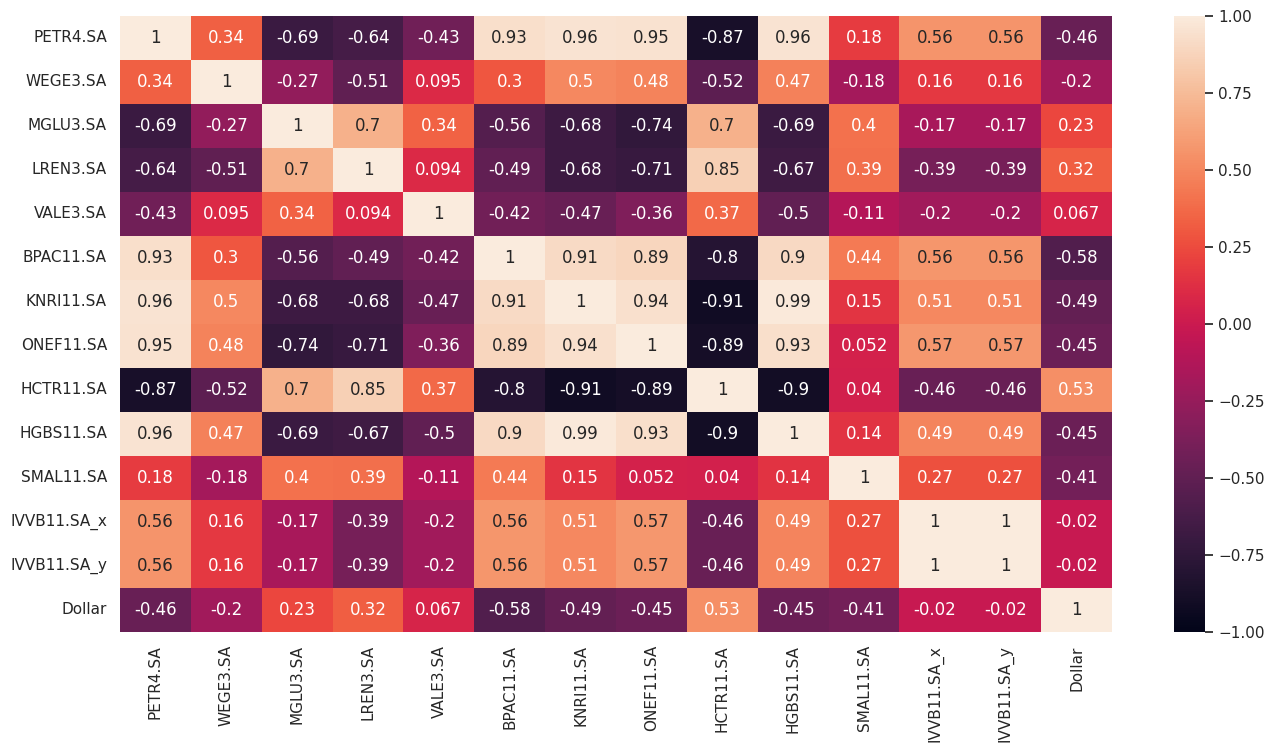

In [80]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)